# LANL Earthquake Prediction: Research Prediction Challenge

### This project is aimed at predicting the timing of labratory earthquakes based on seismic signals

-------------------------------------------

## TO DO:

- Find other time series machine learning models to test on the data
- Come up with data treatment methods, so that ML models can more easily make predictions
- Write a training function that loads the data chunk by chunk in order to fit within ram.
- See if you can find any other earthquake data sets that could be used for extra training
- Blah




## Importing Dependencies :
---

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as ks
print("Successfully Imported Dependencies")

Successfully Imported Dependencies


## Loading Data:
---

The training csv file is approximatley 6 gigabytes so only fractions of the data file will be loaded at any given time.

In [23]:
%%time
Training_Data = pd.read_csv("/Users/gregeales/LANL-Training-Data.csv", nrows=10000000)
print("success")

success
CPU times: user 2.75 s, sys: 279 ms, total: 3.03 s
Wall time: 2.96 s


In [24]:
%%time
Testing_Data = pd.read_csv("/Users/gregeales/LANL-Training-Data.csv", nrows=10000000)
print("success")

success
CPU times: user 2.66 s, sys: 249 ms, total: 2.91 s
Wall time: 2.82 s


## Data Analysis:
---

Training Data includes **acoustic_data** which is the acoustic strength at the time of measurement. The 2nd column is **time_to_failure** which is the time until the next labratory earthquake.

In [9]:
print(Data.head())
print(Data.loc[[1]])
print(Data.loc[[100000, 100001]])

   acoustic_data  time_to_failure
0             12           1.4691
1              6           1.4691
2              8           1.4691
3              5           1.4691
4              8           1.4691
   acoustic_data  time_to_failure
1              6           1.4691
        acoustic_data  time_to_failure
100000              2         1.443598
100001              4         1.443598


Data Successfully Plotted


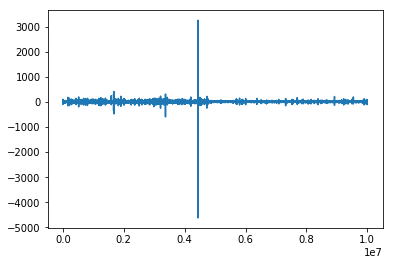

In [10]:
plt.plot(Data["acoustic_data"])
print("Data Successfully Plotted")

There apears to be very little variance relative to the massive recorded spike to the left of the 0.4 value. There seems to be a higher density of activity to the left of the big spike.

## Model Selection:
---

### Recurrent Neural Networks:

In [14]:
X = Data["acoustic_data"].values.reshape([len(Data["acoustic_data"].values), 1, 1])[0:100000]
print(X.shape)
Y = Data["time_to_failure"].values.reshape([len(Data["time_to_failure"].values), 1])[0:100000]
print(Y.shape)

(100000, 1, 1)
(100000, 1)


In [22]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding, RNN

LSTM_Model = Sequential()

LSTM_Model.add(LSTM(15, input_dim=1))
LSTM_Model.add(Dense(15, input_dim=15, activation="relu"))
LSTM_Model.add(Dense(5, input_dim=15, activation="relu"))
LSTM_Model.add(Dense(1, input_dim=5, activation="relu"))

LSTM_Model.compile(optimizer="adam", loss='mean_squared_error')

LSTM_Model.fit(X, Y)

/Users/gregeales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/Users/gregeales/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(15, input_shape=(None, 1))`
  


Epoch 1/1
100000/100000 [==============================] - 20s 199us/step - loss: 0.0518


In [17]:
X = Data["acoustic_data"].values.reshape([len(Data["acoustic_data"].values), 1, 1])[100000:200000]
Y = Data["time_to_failure"].values.reshape([len(Data["time_to_failure"].values), 1])[100000:200000]
print(LSTM_Model.evaluate(X, Y))

100000/100000 [==============================] - 4s 41us/step
0.0008872417857451365


#### Support Vector Machines:

#### 

### Model Optimization
---

### Model Evaluation:
---